In [34]:
# lib downloads
import sys
start_time = time.time()
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install vaex
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install pandas
print("--- %s seconds ---" % (time.time() - start_time))

In [2]:
import time
start_time = time.time()

import vaex
import vaex.jupyter
import vaex.jupyter.model as vjm
import numpy as np
import matplotlib.pyplot as plt
import vaex.jupyter

from vaex.jupyter.widgets import ContainerCard
from ipywidgets import link
import seaborn as sns

import pandas as pd
print("--- %s seconds ---" % (time.time() - start_time))


--- 4.178238868713379 seconds ---


In [3]:
start_time = time.time()
# Dateipfad: ein ordner namens "assets" der im gleichen ordner wie das ipython Notebook liegt und die datei enthält
pandas_df = pd.read_csv('assets/annotation_example3.txt',sep=";")
print("--- %s seconds ---" % (time.time() - start_time))

pandas_df['valueLog'] = pandas_df.apply(lambda row: np.log10(row.value+0.01), axis=1)
print("--- %s seconds ---" % (time.time() - start_time))
pandas_df['backvalueLog'] = pandas_df.apply(lambda row: np.log10(row.backvalue+0.01), axis=1)
print("--- %s seconds ---" % (time.time() - start_time))

df = vaex.from_pandas(df=pandas_df)
print("--- %s seconds ---" % (time.time() - start_time))

display(df)
print("--- %s seconds ---" % (time.time() - start_time))


--- 7.685439586639404 seconds ---
--- 90.92520070075989 seconds ---
--- 173.71893620491028 seconds ---
--- 177.154132604599 seconds ---


#,pos_id,barcode,run_id,test_date,sign,value,backvalue,valueLog,backvalueLog
0,1001200171739,100129017HD,10,2017-07-07 03:07,s,88.33,131.05,1.9461573949223723,2.11747016362012
1,1001200171741,100129017HD,10,2017-07-07 03:07,s,98.66,95.69,1.994185128202317,1.9809119377768436
2,1001200171742,100129017HD,10,2017-07-07 03:07,s,35.03,70.9,1.544564097496043,1.8507074853745373
3,1001200171743,100129017HD,10,2017-07-07 03:07,s,99.09,79.79,1.9960736544852753,1.9020028913507294
4,1001200171744,100129017HD,10,2017-07-07 03:07,s,82.09,143.5,1.914343157119441,2.1568821644393767
...,...,...,...,...,...,...,...,...,...
"5,314,555",1002000172921,100209017HD,9,2017-07-07 09:07,s,88.9,128.91,1.9489506102455483,2.110320296840297
"5,314,556",1002401401231,100249140HD,9,2017-07-07 09:07,s,93.52,91.56,1.9709509343454241,1.9617532141867826
"5,314,557",1002401402813,100249140HD,9,2017-07-07 09:07,s,88.53,93.61,1.9471395176428292,1.9713686367914234
"5,314,558",1BCS600562415,1BCS6Y056LD,16,2017-08-23 09:08,s,89.24,144.05,1.950608224784231,2.158543410440671


--- 177.19413471221924 seconds ---


In [122]:
start_time = time.time()
# in manchen datensätzen heißt die spalte backvalue, in manchen back_value, hier anpassen
df = df['value', 'backvalue', 'sign','valueLog','backvalueLog']
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.0 seconds ---


INFO:MainThread:numexpr.utils:NumExpr defaulting to 4 threads.


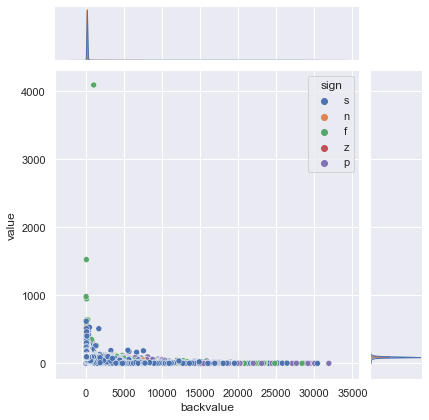

In [155]:
#start_time = time.time()
#df = vaex.from_csv('assets/annotation_example1.txt',sep=";")

#df = df['value', 'back_value', 'sign']
#print(len(df))
#length = len(df)
#display(df)
#print("--- %s seconds ---" % (time.time() - start_time))
sns.set_theme()
sns.jointplot(data=pandas_df, x="backvalue", y="value", hue="sign")

In [64]:
#start_time = time.time()
#df = vaex.from_csv('assets/annotation_example4.csv')
#
#df = df['value', 'backvalue', 'sign']
#print(len(df))
#length = len(df)
#display(df)
#print("--- %s seconds ---" % (time.time() - start_time))


5314518


#,value,backvalue,sign
0,88.33,131.05,s
1,98.66,95.69,s
2,35.03,70.9,s
3,99.09,79.79,s
4,82.09,143.5,s
...,...,...,...
"5,314,513",91.29,62.59,s
"5,314,514",98.03,87.89,s
"5,314,515",83.06,167.81,s
"5,314,516",91.04,104.61,s


--- 10.09101414680481 seconds ---


In [4]:
start_time = time.time()
@vaex.register_function()
def signToNumber(s):
    return ['n','z','p','s','f'].index(s)

df['signNumber'] = df.apply(signToNumber, arguments=[df.sign])
df = df[df.signNumber !=  4]
display(df)

print("--- %s seconds ---" % (time.time() - start_time))

#,pos_id,barcode,run_id,test_date,sign,value,backvalue,valueLog,backvalueLog,signNumber
0,1001200171739,100129017HD,10,2017-07-07 03:07,s,88.33,131.05,1.9461573949223723,2.11747016362012,3
1,1001200171741,100129017HD,10,2017-07-07 03:07,s,98.66,95.69,1.994185128202317,1.9809119377768436,3
2,1001200171742,100129017HD,10,2017-07-07 03:07,s,35.03,70.9,1.544564097496043,1.8507074853745373,3
3,1001200171743,100129017HD,10,2017-07-07 03:07,s,99.09,79.79,1.9960736544852753,1.9020028913507294,3
4,1001200171744,100129017HD,10,2017-07-07 03:07,s,82.09,143.5,1.914343157119441,2.1568821644393767,3
...,...,...,...,...,...,...,...,...,...,...
"5,150,033",1002000172921,100209017HD,9,2017-07-07 09:07,s,88.9,128.91,1.9489506102455483,2.110320296840297,3
"5,150,034",1002401401231,100249140HD,9,2017-07-07 09:07,s,93.52,91.56,1.9709509343454241,1.9617532141867826,3
"5,150,035",1002401402813,100249140HD,9,2017-07-07 09:07,s,88.53,93.61,1.9471395176428292,1.9713686367914234,3
"5,150,036",1BCS600562415,1BCS6Y056LD,16,2017-08-23 09:08,s,89.24,144.05,1.950608224784231,2.158543410440671,3


--- 8.770501613616943 seconds ---


In [5]:
#start_time = time.time()
#@vaex.register_function()
#def log(v):
#    if v < 0.1:
#        return np.log(0.1)
#    return np.log(v)

#df['valueLog'] = df.apply(log, arguments=[df.value])
#df['backvalueLog'] = df.apply(log, arguments=[df.back_value])
#df.execute()
#display(df)

#print("--- %s seconds ---" % (time.time() - start_time))

#,value,back_value,sign,signNumber,valueLog,backvalueLog
0,65.05,50.57,s,3,4.1751562049585145,3.9233585150918917
1,80.39,120.1,s,3,4.386889790339869,4.788324729085938
2,98.83,97.27,s,3,4.593401202388092,4.577490616881349
3,119.92,124.45,s,3,4.786824853794342,4.823904028813601
4,94.73,81.88,s,3,4.551030739887443,4.405254760793088
...,...,...,...,...,...,...
"4,036,691",108.0,86.16,s,3,4.68213122712422,4.456206032848133
"4,036,692",99.36,80.8,s,3,4.598749618185169,4.39197696552705
"4,036,693",78.83,58.85,s,3,4.367293635071817,4.074991833706286
"4,036,694",122.61,104.87,s,3,4.809008586244295,4.652721487846314


--- 0.09100508689880371 seconds ---


In [21]:
start_time = time.time()

# count signs:
display(df.groupby(by='sign').agg({'signNumber': 'count',
                                         'value' : ['mean', 'std'],
                                        'backvalue' : ['mean', 'std']}))
print("--- %s seconds ---" % (time.time() - start_time))

#,sign,count,value_mean,value_std,backvalue_mean,backvalue_std
0,s,4.25807e+06,92.881,19.4163,95.6524,168.88
1,n,880350,100.254,10.8205,111.114,65.8033
2,z,3872,58.5595,48.5111,99.4529,111.977
3,p,7744,51.0124,46.7648,2996.05,4410.38


--- 0.602034330368042 seconds ---


In [34]:
#start_time = time.time()

#def valuesWithinMeanPM3Std(d)-> vaex.dataframe.DataFrameArrays:
#    start_time = time.time()

#    stdValue = d.std('value')
 #   stdBackvalue = d.std('backvalue')
  #  meanValue = d.mean('value')
   # meanBackvalue = d.mean('backvalue')
    #meanPlusMinus3StdValue = (meanValue-3*stdValue, meanValue +3*stdValue)
    #meanPlusMinus3StdBackvalue = (meanBackvalue -3*stdBackvalue, meanBackvalue +3*stdBackvalue)
    #CleansedWith3Std = d[(d['value'] <= meanPlusMinus3StdValue[1] )& (d['value'] >= meanPlusMinus3StdValue[0])& (d['backvalue'] <= meanPlusMinus3StdBackvalue[1]) & (d['backvalue'] >= meanPlusMinus3StdBackvalue[0])]
    #print(len(d))
    #print(len(CleansedWith3Std))
    #print("reduced to " +str(100*len(CleansedWith3Std)/len(d)) +"%")
    #print("--- %s seconds ---" % (time.time() - start_time))
    #return CleansedWith3Std
#print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


In [5]:
start_time = time.time()


dfn = df[df.signNumber == 0]
#dfn = valuesWithinMeanPM3Std(dfn)

dfz = df[df.signNumber == 1]
#dfz = valuesWithinMeanPM3Std(dfz)

dfp = df[df.signNumber == 2]
#dfp = valuesWithinMeanPM3Std(dfp)
#dfp = dfp[dfp.backvalue < 800]
#print("further reduced to length: " +str(len(dfp)))

dfs = df[df.signNumber == 3]
#dfs = valuesWithinMeanPM3Std(dfs)

#df = dfn.concat(dfz)
#df = df.concat(dfp)
#df = df.concat(dfs)
#df = vaex.concat([dfn,dfz,dfp,dfs])
print(type(df))
#print(type(df))

print("--- %s seconds ---" % (time.time() - start_time))

<class 'vaex.dataframe.DataFrameArrays'>
--- 0.011000633239746094 seconds ---


In [6]:
start_time = time.time()

df = df[(df['value'] < 200) & (df['backvalue'] < 800)]
display(df)
print("--- %s seconds ---" % (time.time() - start_time))

#,pos_id,barcode,run_id,test_date,sign,value,backvalue,valueLog,backvalueLog,signNumber
0,1001200171739,100129017HD,10,2017-07-07 03:07,s,88.33,131.05,1.9461573949223723,2.11747016362012,3
1,1001200171741,100129017HD,10,2017-07-07 03:07,s,98.66,95.69,1.994185128202317,1.9809119377768436,3
2,1001200171742,100129017HD,10,2017-07-07 03:07,s,35.03,70.9,1.544564097496043,1.8507074853745373,3
3,1001200171743,100129017HD,10,2017-07-07 03:07,s,99.09,79.79,1.9960736544852753,1.9020028913507294,3
4,1001200171744,100129017HD,10,2017-07-07 03:07,s,82.09,143.5,1.914343157119441,2.1568821644393767,3
...,...,...,...,...,...,...,...,...,...,...
"5,133,287",1002000172921,100209017HD,9,2017-07-07 09:07,s,88.9,128.91,1.9489506102455483,2.110320296840297,3
"5,133,288",1002401401231,100249140HD,9,2017-07-07 09:07,s,93.52,91.56,1.9709509343454241,1.9617532141867826,3
"5,133,289",1002401402813,100249140HD,9,2017-07-07 09:07,s,88.53,93.61,1.9471395176428292,1.9713686367914234,3
"5,133,290",1BCS600562415,1BCS6Y056LD,16,2017-08-23 09:08,s,89.24,144.05,1.950608224784231,2.158543410440671,3


--- 0.15400910377502441 seconds ---


In [125]:
start_time = time.time()
# in manchen datensätzen heißt die spalte backvalue, in manchen back_value, hier anpassen
v = 'value'
b = 'backvalue'
# nicht nach unten beschränken
df = df[((((df['signNumber'] == 0) 
          & (df[v] < dfn.mean(v)+3*dfn.std(v))) 
          & ((df[b] < dfn.mean(b)+3*dfn.std(b)))) 
         | (((df['signNumber'] == 1) 
             & (df[v] < dfz.mean(v)+3*dfz.std(v)) ) 
            & ((df[b] < dfz.mean(b)+3*dfz.std(b))))
        | (((df['signNumber'] == 2) 
            & (df[v] < dfp.mean(v)+3*dfp.std(v)))
           & ((df[b] < dfp.mean(b)+3*dfp.std(b))
              & (df[b] < 800)))
        | (((df['signNumber'] == 3) 
            & (df[v] < dfs.mean(v)+3*dfs.std(v)) )
           & ((df[b] < dfs.mean(b)+3*dfs.std(b)) )))]
#df = df[((((df['signNumber'] == 0) 
#          & (df[v] < dfn.mean(v)+3*dfn.std(v)) 
 #         & (df[v] > dfn.mean(v)-3*dfn.std(v))) 
  #       & ((df[b] < dfn.mean(b)+3*dfn.std(b)) 
   #         & (df[b] > dfn.mean(b)-3*dfn.std(b)))) 
    #    | (((df['signNumber'] == 1) 
     #       & (df[v] < dfz.mean(v)+3*dfz.std(v)) 
      #      & (df[v] > dfz.mean(v)-3*dfz.std(v))) 
       #    & ((df[b] < dfz.mean(b)+3*dfz.std(b)) 
        #      & (df[b] > dfz.mean(b)-3*dfz.std(b))))
        #| (((df['signNumber'] == 2) 
        #    & (df[v] < dfp.mean(v)+3*dfp.std(v)) 
        #    & (df[v] > dfp.mean(v)-3*dfp.std(v)))
         #  & ((df[b] < dfp.mean(b)+3*dfp.std(b)) 
        #      & (df[b] > dfp.mean(b)-3*dfp.std(b)) 
        #      & (df[b] < 800)))
        #| (((df['signNumber'] == 3) 
         #   & (df[v] < dfs.mean(v)+3*dfs.std(v)) 
          #  & (df[v] > dfs.mean(v)-3*dfs.std(v)))
           #& ((df[b] < dfs.mean(b)+3*dfs.std(b)) 
            #  & (df[b] > dfs.mean(b)-3*dfs.std(b)))))]
df = df[(df[v] > 0) & (df[b] > 0)]
print(type(df))
display(df)
print("--- %s seconds ---" % (time.time() - start_time))

<class 'vaex.dataframe.DataFrameArrays'>


#,value,backvalue,sign,valueLog,backvalueLog,signNumber
0,88.33,131.05,s,1.9461573949223723,2.11747016362012,3
1,98.66,95.69,s,1.994185128202317,1.9809119377768436,3
2,35.03,70.9,s,1.544564097496043,1.8507074853745373,3
3,99.09,79.79,s,1.9960736544852753,1.9020028913507294,3
4,82.09,143.5,s,1.914343157119441,2.1568821644393767,3
...,...,...,...,...,...,...
"5,091,496",88.9,128.91,s,1.9489506102455483,2.110320296840297,3
"5,091,497",93.52,91.56,s,1.9709509343454241,1.9617532141867826,3
"5,091,498",88.53,93.61,s,1.9471395176428292,1.9713686367914234,3
"5,091,499",89.24,144.05,s,1.950608224784231,2.158543410440671,3


--- 70.46903038024902 seconds ---


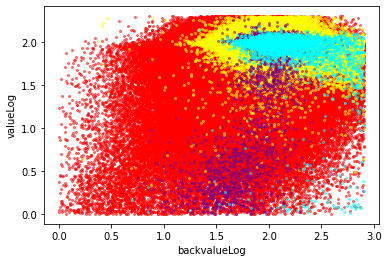

--- 5.149294137954712 seconds ---


In [10]:
start_time = time.time()
df = df[(df['valueLog'] > 0) & (df['backvalueLog'] > 0)]

# substanzen
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 's', c="red", alpha=0.5, s=4., length_check = False)
# neutral 
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 'n', c="yellow", alpha=0.5, s=4., length_check = False)
# negativ
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 'z', c="purple", alpha=0.5, s=4., length_check = False)
#positiv
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 'p', c="cyan", alpha=0.5, s=4., length_check = False)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

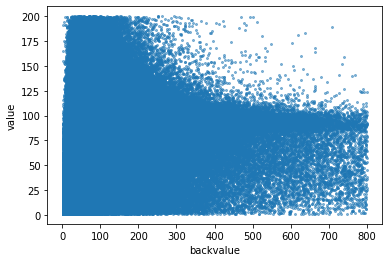

In [15]:
df.scatter(df.backvalue, df.value, alpha = 0.5, s=4, length_check = False)


--- 2.009114980697632 seconds ---


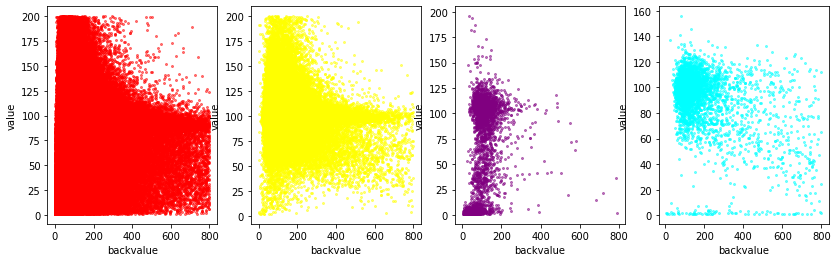

In [16]:
start_time = time.time()
# in manchen datensätzen heißt die spalte backvalue, in manchen back_value, hier anpassen

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14,4))
#plt.show()
plt.sca(ax1)
df.scatter(df.backvalue, df.value,selection=df.sign == 's', c="red", alpha=0.5, s=4., length_check = False)
plt.sca(ax2)
df.scatter(df.backvalue, df.value,selection=df.sign == 'n', c="yellow", alpha=0.5, s=4., length_check = False)
plt.sca(ax3)
df.scatter(df.backvalue, df.value,selection=df.sign == 'z', c="purple", alpha=0.5, s=4., length_check = False)
plt.sca(ax4)
df.scatter(df.backvalue, df.value,selection=df.sign == 'p', c="cyan", alpha=0.5, s=4., length_check = False)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
#df =df3.to_pandas_df(["value", "backvalue","signNumber"])

In [ ]:
#start_time = time.time()
#sns.jointplot(
#    data=df, x="value", y="backvalue",
#    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),hue="signNumber"
#)
#print("--- %s seconds ---" % (time.time() - start_time))

In [52]:
ContainerCard(title='My plot',
              subtitle="using vaex-jupyter and bqplot",
              main=(df[df['sign'] == 'n'].widget.heatmap('backvalueLog','valueLog', colorbar= True)),
              controls=[selection_widget],
              show_controls=True,
              card_props={'style': 'min-width: 800px;'})



ContainerCard(card_props={'style': 'min-width: 800px;'}, controls=[ExpressionSelectionTextArea(label='Filter b…

In [100]:
dfnh.children[2].interaction.selected_x[0]
dfnh.children[2].interaction.selected_x[1]
dfnh.children[2].interaction.selected_y[0]
dfnh.children[2].interaction.selected_y[1]
dfnh.children

AttributeError: 'list' object has no attribute 'get'

In [93]:
#link((dfnh, 'children'),(dfsh, 'children'))

TypeError: Heatmap(children=[ToolsToolbar(interact_value='select-rect', supports_normalize=False, template='<template>\n  <v-toolbar flat>\n    <v-btn-toggle v-model="interact_value">\n      <v-tooltip bottom v-for="item in interact_items" :key="item.value">\n          <template v-slot:activator="{ on }">\n              <v-btn v-on="on" :value="item.value">\n                  <v-icon>{{ item.icon }}</v-icon>\n                  <span v-if="item.html" v-html="item.html"></span>\n              </v-btn>\n          </template>\n        <span>{{ item.tooltip }}</span>\n      </v-tooltip>\n    </v-btn-toggle>\n    <v-select v-if="supports_transforms" v-model="transform_value" :items="transform_items" class="pa-4" style="max-width: 180px"/>\n    <v-btn-toggle v-model="z_normalize" exclusive>\n      <v-tooltip bottom v-if="supports_normalize">\n          <template v-slot:activator="{ on }">\n              <v-btn v-on="on" :value="true" class="pa-4">\n                  <v-icon>mdi-numeric-1-box-outline</v-icon>\n              </v-btn>\n          </template>\n        <span>Normalize</span>\n      </v-tooltip>\n    </v-btn-toggle>\n    <v-btn-toggle v-model="selection_mode">\n      <v-tooltip bottom v-for="item in selection_mode_items" :key="item.value">\n          <template v-slot:activator="{ on }">\n              <v-btn v-on="on" :value="item.value">\n                  <v-icon>{{ item.icon }}</v-icon>\n                  <span v-if="item.html" v-html="item.html"></span>\n              </v-btn>\n          </template>\n        <span>{{ item.tooltip }}</span>\n      </v-tooltip>\n    </v-btn-toggle>\n  </v-toolbar>\n\n</template>', transform_items=['identity', 'log', 'log10', 'log1p', 'log1p'], transform_value='log'), Container(children=[ProgressCircularNoAnimation(color='#9ECBF5', hidden=True, size=30, text='', value=100.0, width=5), Status(value='Ready')]), Figure(axes=[Axis(color='#777', grid_color='#777', grid_lines='none', label='backvalueLog', label_color='#777', label_offset='2em', scale=LinearScale(allow_padding=False, max=2.4892973991666847, min=0.3692158574101428), side='bottom'), Axis(color='#777', grid_color='#777', grid_lines='none', label='valueLog', label_color='#777', label_offset='3em', orientation='vertical', scale=LinearScale(allow_padding=False, max=2.1229363730163042, min=1.8312937443770096), side='left')], background_style={'fill': 'none'}, fig_margin={'bottom': 40, 'left': 60, 'right': 10, 'top': 10}, interaction=BrushSelector(brushing=True, color='green', selected_x=array([1.95921225, 2.09329624]), selected_y=array([1.84014475, 1.88762146]), x_scale=LinearScale(allow_padding=False, max=2.4892973991666847, min=0.3692158574101428), y_scale=LinearScale(allow_padding=False, max=2.1229363730163042, min=1.8312937443770096)), marks=[Image(image=Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x01\x00\x08\x06\x00\x00\x00\\r\xa8f\x00\...'), interactions={'hover': 'tooltip'}, scales={'x': LinearScale(allow_padding=False, max=2.4892973991666847, min=0.3692158574101428), 'y': LinearScale(allow_padding=False, max=2.1229363730163042, min=1.8312937443770096)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}}, tooltip_style={'opacity': 0.9}, x=array([0.36921586, 2.4892974 ]), y=array([1.83129374, 2.12293637]))], padding_y=0.0, scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0)), Output()]) has no trait 'children[2]'

In [128]:
#selection_widget = df.widget.selection_expression(initial_value=None, name='default')
selection_widget = df.widget.selection_expression()
dfnh = (df[df['sign'] == 'n'].widget.heatmap('backvalueLog','valueLog', selection=[None,True,selection_widget], selection_interact='default',colorbar= True))
display(dfnh)
await vaex.jupyter.gather()
dfzh = (df[df['sign'] == 'z'].widget.heatmap('backvalueLog','valueLog', selection=[None,True,selection_widget], selection_interact='default',colorbar= True))
display(dfzh)
await vaex.jupyter.gather()
dfph = (df[df['sign'] == 'p'].widget.heatmap('backvalueLog','valueLog', selection=[None,True,selection_widget], selection_interact='default',colorbar= True))
display(dfph)
await vaex.jupyter.gather()
dfsh = (df[df['sign'] == 's'].widget.heatmap('backvalueLog','valueLog', selection=[None,True,selection_widget], selection_interact='default',colorbar= True))
display(dfsh)
await vaex.jupyter.gather()
display(selection_widget)


ValueError: No selection with name 'default'

In [132]:
start_time = time.time()
# benutzeranleitung: diese Zeile und die darunterliegende ausführen, 
# dann irgendwas in dem darunterliegenden histogramm markieren, damit die verknüpfung zwischen den plots hergestellt wird
# dann die zeile unter dem histogramm ausführen, um die säulendiagramme zu erhalten 
# (diese müssen bei jeder markierung neu manuell ausgeführt werden, zur zeit unklar, ob automatisch möglich)
# falls statt der grafischen Oberfläche das selection widget (die zeile unter dem plot) benutzt werden möchte kann bsp über folgenden Syntax eine Auswahl getroffen werden:
# (signNumber == 1) & (valueLog > 1.5) & (backvalueLog > 1)
selection_widget = df.widget.selection_expression('default')

display(df.widget.heatmap('backvalueLog','valueLog', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()
(selection_widget)
print("--- %s seconds ---" % (time.time() - start_time))

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

--- 0.9390537738800049 seconds ---


In [133]:
start_time = time.time()

selection_widget = df.widget.selection_expression('default')
await vaex.jupyter.gather()
display(df[df.signNumber == 0].widget.heatmap('backvalueLog','valueLog', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()
display(df[df.signNumber == 1].widget.heatmap('backvalueLog','valueLog', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()
display(df[df.signNumber == 2].widget.heatmap('backvalueLog','valueLog', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()
display(df[df.signNumber == 3].widget.heatmap('backvalueLog','valueLog', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()
display(selection_widget)
print("--- %s seconds ---" % (time.time() - start_time))


Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

ExpressionSelectionTextArea(error_messages="Column or variable 'default' does not exist.", label='Filter by cu…

--- 38.61820888519287 seconds ---


In [134]:
#await vaex.jupyter.gather()
histogram = df.widget.histogram(df.signNumber,  selection=[None, True, selection_widget], selection_interact='default',limits=[-1, 4])
histogram.tool = 'select-x'
histogram

Histogram(children=[ToolsToolbar(interact_items=[{'value': 'pan-zoom', 'icon': 'pan_tool', 'tooltip': 'Pan & z…

C:\Users\Buffel\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


      x     total  selection
0  0: n  5.935796   0.000000
1  1: z  3.584444   0.000000
2  2: p  3.605844   1.949390
3  3: s  6.625421   1.361728


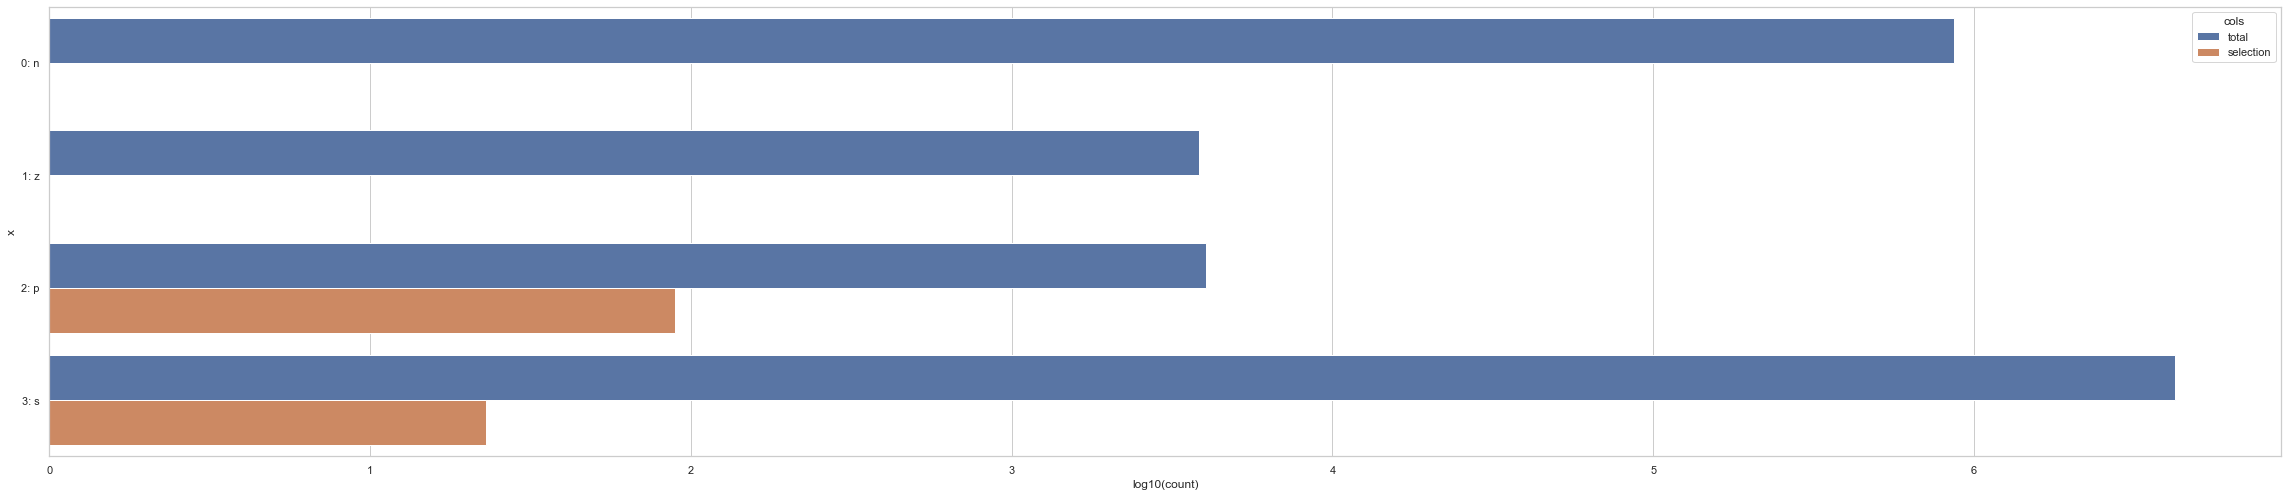

In [153]:
# muss bei jeder selektion manuell neu ausgeführt werden
chart_data = histogram.children[2].marks[0].y
#print(chart_data)
indexes = [np.where(chart_data[0] == y)[0][0] for y in chart_data[0] if y != 0]
y1 = [np.log10(chart_data[0][i]) for i in indexes]
y2 = [(np.log10(chart_data[1][i]),0)[int(chart_data[1][i] < 0.1)] for i in indexes]
labels = ['0: n', '1: z', '2: p', '3: s']
#print(y1)
#print(y2)
d = {'category': [labels[x] for x in range(len(y1))], 'total': y1, 'selection': y2}

dfbar = pd.DataFrame(data=d)
#print(y1)
#print(y2)
print(dfbar)

sns.set_theme(style="whitegrid")
a4_dims = (40, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
#sns.barplot(x="selection", y="x", data=dfbar)
#plt.show()

#fig, ax = plt.subplots(figsize=a4_dims)
#sns.barplot(x="total", y="x", data=dfbar)

dfbar = dfbar.melt('x', var_name='cols',  value_name='log10(count)')
g = sns.barplot(x="log10(count)", y="x", hue='cols', data=dfbar)
# title
#new_title = 'My title'
#g._legend.set_title(new_title)
# replace labels
#new_labels = ['0: n', '1: z', '2: p', '3: s']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
#plt.legend(['0: n', '1: z', '2: p', '3: s'])
plt.show()
# gleiche axen